# 4주차 차원축소 실습

### Eigenvalue & Eigenvector 구하기 with numpy

In [1]:
import numpy as np
import numpy.linalg as lin
import matplotlib.pyplot as plt
import pandas as pd

np.random.seed(0)

testmatrix = np.array([[3,2],
                        [2,3]])

#Eigenvalue와 Eigenvector 함께 출력
print (lin.eig(testmatrix)) 

#Eigenvalue만 
print (lin.eig(testmatrix)[0])  

#Eigenvector만
print (lin.eig(testmatrix)[1]) 

(array([5., 1.]), array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]]))
[5. 1.]
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


In [2]:
mat = lin.eig(testmatrix)[1] #eigenvector
print(mat[:,0]) #첫번째 eigenvector
print(mat[:,1]) #두번째 eigenvector

[0.70710678 0.70710678]
[-0.70710678  0.70710678]


### 스펙트럼분해 A=PΛP'
대칭행렬의 성질


In [3]:
# PP'=I인지 확인!
# e0'*e0 = 1 : 단위 벡터
print(mat[:,0].T.dot(mat[:,0]))
print(mat[:,1].T.dot(mat[:,1]))

0.9999999999999999
0.9999999999999999


In [4]:
# 대칭행렬의 고유벡터들의 내적=0, 직교하는지 확인!!
# e0'*e1 = 0 고유벡터간의 직교
print(mat[:,0].T.dot(mat[:,1])) 

0.0


### PCA 간단예제

In [5]:
# 랜덤값 생성
x = np.random.randn(100)
x2 = 0.5*x + np.random.randn(100)*0.3
X = pd.DataFrame({'x1':x,'x2':x2})

In [6]:
X

,x1,x2
0,1.764052,1.446971
1,0.400157,-0.204249
2,0.978738,0.108223
3,2.240893,1.411266
4,1.867558,0.581842
...,...,...
95,0.706573,0.301823
96,0.010500,0.236787
97,1.785870,1.139986
98,0.126912,0.712427


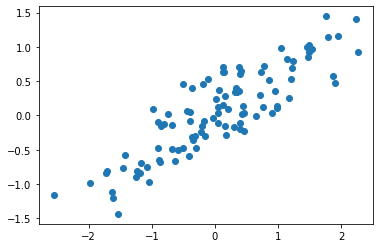

In [7]:
plt.scatter(X['x1'],X['x2'])

In [8]:
# 공분산행렬(데이터 구조를 설명)
mat = X.cov()
mat

,x1,x2
x1,1.026087,0.548351
x2,0.548351,0.389150


In [9]:
lin.eig(mat) #eigenvalue & eigenvaector

(array([1.34174117, 0.07349682]),
 array([[ 0.86666587, -0.49888903],
        [ 0.49888903,  0.86666587]]))

In [10]:
e1 = lin.eig(mat)[1][:,0] #첫번째 고유벡터

In [11]:
e1

array([0.86666587, 0.49888903])

In [12]:
e2 = lin.eig(mat)[1][:,1] #두번째 고유벡터

In [13]:
e2

array([-0.49888903,  0.86666587])

### 공분산행렬 스펙트럼 분해

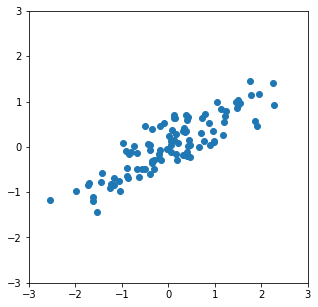

In [14]:
plt.figure(figsize=(5,5))
plt.xlim(-3, 3) 
plt.ylim(-3, 3) 
plt.scatter(X['x1'],X['x2']);

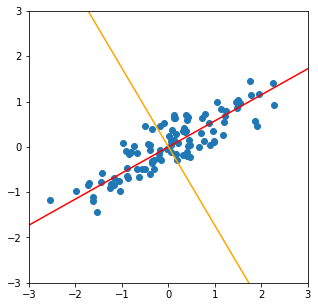

In [15]:
plt.figure(figsize=(5,5))
plt.xlim(-3, 3) 
plt.ylim(-3, 3) 
plt.scatter(X['x1'],X['x2'])

# 고유벡터 시각화
plt.plot([-4*e1[0],4*e1[0]],[-4*e1[1],4*e1[1]],c='red')
plt.plot([-4*e2[0],4*e2[0]],[-4*e2[1],4*e2[1]],c='orange')

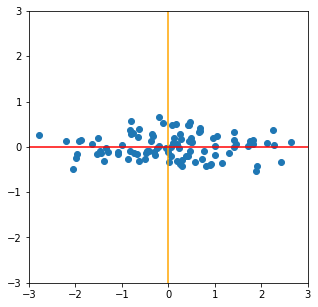

In [16]:
plt.figure(figsize=(5,5))
plt.xlim(-3, 3) 
plt.ylim(-3, 3) 

# 회전된 결과
PC1 = e1.dot(X.T)
# PC1 = e1[0]*X['x1'] + e1[1]*X['x2']
PC2 = e2.dot(X.T)
# PC2 = e2[0]*X['x1'] + e2[1]*X['x2']

plt.scatter(PC1,PC2);

plt.plot([0,0],[-3,3],c='orange');
plt.plot([-3,3],[0,0],c='red');

### sklearn PCA

In [17]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 2개로 축소 
model = PCA(n_components=2)
scaler = StandardScaler() # 정규화
X_scale = scaler.fit_transform(X)
# fit : component 생성
# transform : 변환후 반환
# fit_transform : fit과 transform 동시 적용

pca_features = model.fit_transform(X_scale)

In [18]:
#print(pca_features) #projection된 후의 데이터들 좌표

In [19]:
pca_features

array([[-2.78198419e+00,  3.90667682e-01],
       [ 5.60007580e-02, -5.33562940e-01],
       [-7.05893950e-01, -5.83505909e-01],
       [-3.07584784e+00,  1.54503893e-02],
       [-1.86902633e+00, -6.67524489e-01],
       [ 6.82095382e-01,  7.73095386e-01],
       [-9.62323314e-01, -2.86876804e-01],
       [ 5.51915265e-01, -2.55618029e-01],
       [-4.21930607e-01,  6.50682336e-01],
       [-9.23882177e-01,  4.31669256e-01],
       [-7.17319565e-01,  5.99124145e-01],
       [-2.05425461e+00,  9.76053904e-02],
       [-5.69027214e-01, -4.14905751e-01],
       [-7.03412061e-01,  6.16603158e-01],
       [-3.68582461e-01, -1.70305986e-01],
       [-5.94359237e-01,  2.10082746e-01],
       [-2.11893826e+00,  1.06435721e-01],
       [ 4.17828595e-01, -4.60402162e-02],
       [-5.03783328e-01,  1.48421097e-01],
       [ 8.74593274e-01,  4.07754035e-01],
       [ 3.22073709e+00,  4.45419500e-01],
       [-3.51076952e-01, -4.82130479e-01],
       [-1.09673237e+00, -3.22845323e-02],
       [ 5.

In [20]:
model.explained_variance_ # eigen value
model.explained_variance_ratio_ # 분산 비율

array([0.93388796, 0.06611204])

#### PC scores
- 변환된 주성분 $y_1, \ldots, y_p$ 값 

In [21]:
pca_features.shape, X_scale.shape # pca_features = y1, y2 ~ yp X = 원변수 x1, x2, ~ xp

((100, 2), (100, 2))

Example) 1st PC: $y_1 = \mathbf a_1'\mathbf x = a_{11}x_1 +a_{21}x_2 + \cdots + a_{p1} x_p$

In [22]:
model.components_.shape # 2개의 원변수에 대한 2개의 weight값이 2개의 pc에 대해 들어가 있음

(2, 2)

${a}'_1 \sim {a}'_7$의 가중치 == 제일큰 고유값 $\lambda_{i}$에 대응되는 고유벡터 $e_{i}$ 

In [23]:
model.components_

array([[-0.70710678, -0.70710678],
       [-0.70710678,  0.70710678]])

In [24]:
model.components_[0]  # loadings: a_i1

array([-0.70710678, -0.70710678])

In [25]:
y1 = np.matmul(X_scale, model.components_[0]) 
# y1 = x'a, 고유벡터를 통해 원변수화 선형 결합한 pc1과 pca를 통해 구한 pc1과 동일

In [26]:
y1

array([-2.78198419,  0.05600076, -0.70589395, -3.07584784, -1.86902633,
        0.68209538, -0.96232331,  0.55191527, -0.42193061, -0.92388218,
       -0.71731956, -2.05425461, -0.56902721, -0.70341206, -0.36858246,
       -0.59435924, -2.11893826,  0.41782859, -0.50378333,  0.87459327,
        3.22073709, -0.35107695, -1.09673237,  0.59417324, -2.5438483 ,
        2.00396901,  0.1946099 , -0.2900145 , -2.07416218, -1.90303177,
        0.17022097, -0.56095662,  1.46306374,  2.61114283,  0.76362941,
       -0.32587484, -1.65693393, -1.35320481,  0.46107985,  0.86191234,
        1.94662693,  1.75899696,  2.21608345, -2.59277859, -0.06255941,
        0.33813966,  2.00856743, -1.26603902,  2.60535775,  0.53224375,
        1.2656857 , -0.97333295,  1.00791843,  1.88731139,  0.17352927,
       -0.21367898, -0.3655461 ,  0.0886426 ,  1.30256593,  0.71480116,
        1.12909122, -0.09833373,  0.81323792,  2.26856435,  0.29732771,
        0.32622047,  2.51818569,  0.04372471,  0.8513743 , -0.07

In [27]:
pca_features[:,0]

array([-2.78198419,  0.05600076, -0.70589395, -3.07584784, -1.86902633,
        0.68209538, -0.96232331,  0.55191527, -0.42193061, -0.92388218,
       -0.71731956, -2.05425461, -0.56902721, -0.70341206, -0.36858246,
       -0.59435924, -2.11893826,  0.41782859, -0.50378333,  0.87459327,
        3.22073709, -0.35107695, -1.09673237,  0.59417324, -2.5438483 ,
        2.00396901,  0.1946099 , -0.2900145 , -2.07416218, -1.90303177,
        0.17022097, -0.56095662,  1.46306374,  2.61114283,  0.76362941,
       -0.32587484, -1.65693393, -1.35320481,  0.46107985,  0.86191234,
        1.94662693,  1.75899696,  2.21608345, -2.59277859, -0.06255941,
        0.33813966,  2.00856743, -1.26603902,  2.60535775,  0.53224375,
        1.2656857 , -0.97333295,  1.00791843,  1.88731139,  0.17352927,
       -0.21367898, -0.3655461 ,  0.0886426 ,  1.30256593,  0.71480116,
        1.12909122, -0.09833373,  0.81323792,  2.26856435,  0.29732771,
        0.32622047,  2.51818569,  0.04372471,  0.8513743 , -0.07

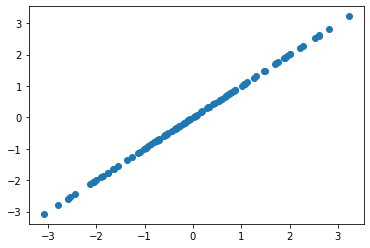

In [28]:
# 원변수 x에 대해 주성분점수 a'1을 선형결합한 값과 주성분 y1의 scatter plot을 확인해 보면 동일한 것을 확인할 수 있다.

plt.scatter(np.matmul(X_scale, model.components_[0]), pca_features[:,0])  
plt.show()

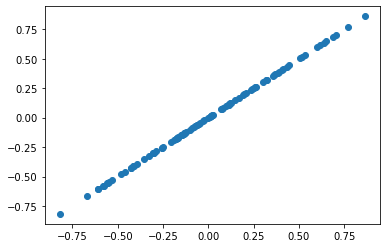

In [29]:
plt.scatter(np.matmul(X_scale, model.components_[1]), pca_features[:,1])
plt.show()

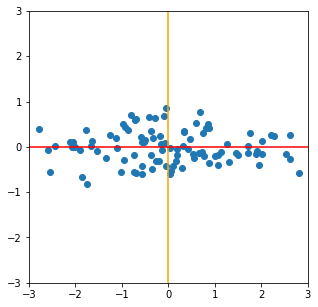

In [30]:
plt.figure(figsize=(5,5))
plt.xlim(-3, 3) 
plt.ylim(-3, 3) 

PC1 = pca_features[:,0] 
PC2 = pca_features[:,1] 

plt.scatter(PC1,PC2)

plt.plot([0,0],[-3,3],c='orange');
plt.plot([-3,3],[0,0],c='red');

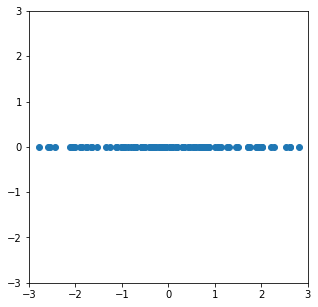

In [31]:
plt.figure(figsize=(5,5))
plt.xlim(-3, 3) 
plt.ylim(-3, 3) 

# 1개의 주성분만 표현
plt.scatter(PC1,len(PC1)*[0]);

# IRIS DATA

In [32]:
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [33]:
# 데이터 로드
iris = datasets.load_iris()

In [34]:
labels = np.array(iris.target)
data = pd.DataFrame(iris.data,columns=['Sepal length','Sepal width','Petal length','Petal width'])

In [35]:
data.head()

,Sepal length,Sepal width,Petal length,Petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


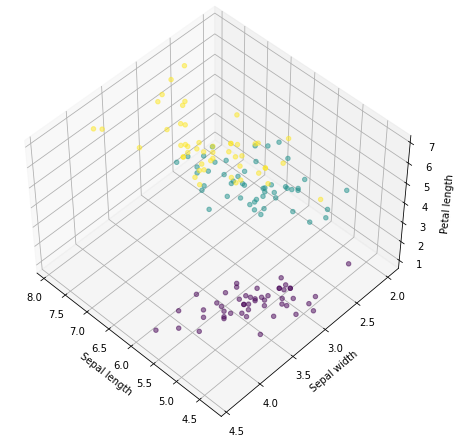

In [36]:
# 3차원
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(data['Sepal length'],data['Sepal width'],data['Petal length'],c=labels,alpha=0.5, label=labels)
ax.set_xlabel('Sepal length')
ax.set_ylabel('Sepal width')
ax.set_zlabel('Petal length')
plt.show()

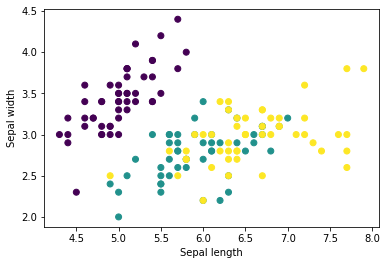

In [37]:
# 2차원
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.scatter(data['Sepal length'],data['Sepal width'],c=labels);
plt.show()

### PCA

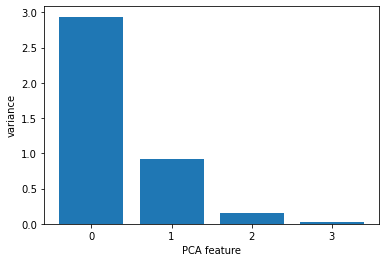

In [38]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# 정규화
scaler = StandardScaler()

# pca , 디폴트 components는 n(전체 feature 수)
pca = PCA()

# pipeline
pipeline = make_pipeline(scaler,pca)

# Fit the pipeline to 'samples'
# pipeline의 fit = 내장 전처리함수의 fit_transform 호출
pipeline.fit(data)

features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)  #pca.explained_variance_ : eigenvalue
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

In [39]:
print("Eigen value : ", pca.explained_variance_) # eigenvalue, lambda
print("주성분에 의해 설명되는 비율 : ", pca.explained_variance_ratio_) # 처음 k개의 주성분에 의해 설명되는 변동의 비율
print("주성분에 의해 설명되는 비율 : ", pca.explained_variance_/ sum(pca.explained_variance_))

Eigen value :  [2.93808505 0.9201649  0.14774182 0.02085386]
주성분에 의해 설명되는 비율 :  [0.72962445 0.22850762 0.03668922 0.00517871]
주성분에 의해 설명되는 비율 :  [0.72962445 0.22850762 0.03668922 0.00517871]


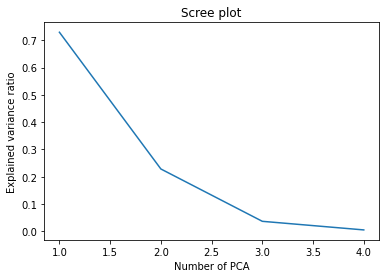

In [40]:
plt.title("Scree plot")
plt.plot(np.arange(1,data.shape[1]+1), pca.explained_variance_ratio_)
plt.xlabel('Number of PCA')
plt.ylabel('Explained variance ratio')
plt.show()

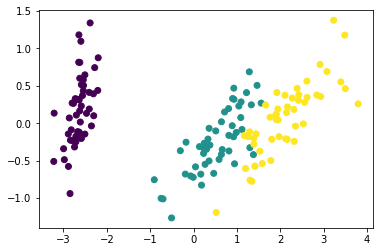

In [41]:
# 2차원
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

model = PCA(n_components=2)
pca_features = model.fit_transform(data)

pc1 = pca_features[:,0]
pc2 = pca_features[:,1]
plt.scatter(pc1,pc2,c=labels);
plt.show();

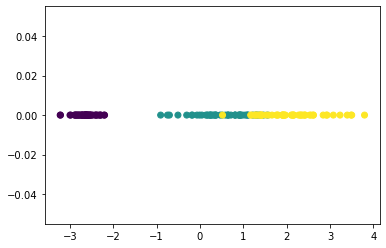

In [42]:
# 1차원
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

model = PCA(n_components=1)
pca_features = model.fit_transform(data)

pc1 = pca_features[:,0]
pc2 = len(pc1)*[0]
plt.scatter(pc1,pc2,c=labels);
plt.show();

### LDA

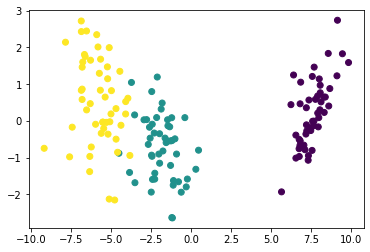

In [43]:
# 2차원
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt

model = LinearDiscriminantAnalysis(n_components=2)
lda_features = model.fit_transform(data, labels)

lc1 = lda_features[:,0]
lc2 = lda_features[:,1]
plt.scatter(lc1,lc2,c=labels)
plt.show();

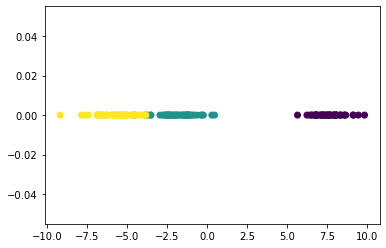

In [44]:
# 1차원
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt

model = LinearDiscriminantAnalysis(n_components=1)
lda_features = model.fit_transform(data, labels)

lc1 = lda_features[:,0]
lc2 = len(lc1)*[0]
plt.scatter(lc1,lc2,c=labels)
plt.show();

### TSNE

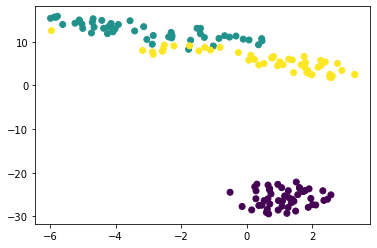

In [45]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

model = TSNE(learning_rate=100.0) #10.0~1000.0
transformed = model.fit_transform(data)

tc1 = transformed[:,0]
tc2 = transformed[:,1]
plt.scatter(tc1,tc2,c=labels)

plt.show()

### 사진 압축

- 100개의 사진과 얼굴의 각 부위의 특징을 포함하고 있는 데이터
- 이미지의 픽셀 값(96*96)을 벡터로 변환하여 저장 

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

face = pd.read_csv('face100.csv')
im_train = face.Image

In [47]:
face.shape

(100, 31)

In [48]:
face.Image[0]

'238 236 237 238 240 240 239 241 241 243 240 239 231 212 190 173 148 122 104 92 79 73 74 73 73 74 81 74 60 64 75 86 93 102 100 105 109 114 121 127 132 134 137 137 140 139 138 137 137 140 141 143 144 147 148 149 147 147 148 145 147 144 146 147 147 143 134 130 130 128 116 104 98 90 82 78 85 88 86 80 77 87 108 111 115 128 133 188 242 252 250 248 251 250 250 250 235 238 236 238 238 237 238 242 241 239 237 233 215 195 187 156 119 103 93 78 68 73 75 75 72 75 70 61 66 77 91 96 106 108 113 120 125 131 134 138 135 138 139 145 144 144 142 140 141 141 148 147 150 149 152 151 149 150 147 148 144 148 144 146 146 143 139 128 132 135 128 112 104 97 87 78 79 83 85 83 75 75 89 109 111 117 117 130 194 243 251 249 250 249 250 251 237 236 237 238 237 238 241 238 238 238 241 221 195 187 163 124 106 95 81 68 70 73 73 72 73 69 65 74 82 94 103 110 111 119 127 135 140 139 144 144 145 143 143 143 146 144 144 147 146 148 147 150 146 147 150 150 149 147 147 144 147 144 149 146 144 144 144 140 131 133 133 125 110 

In [49]:
im_train2 = np.zeros((face.shape[0], 9216)) # 96*96 
for j in range(face.shape[0]):
    im_train2[j,:]=np.array([int(i) for i in im_train[j].split()])

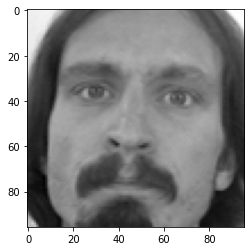

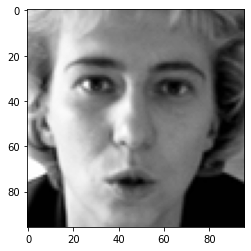

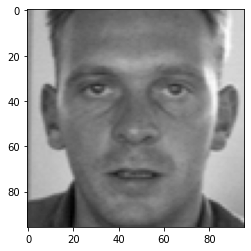

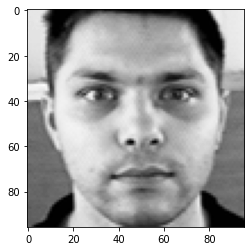

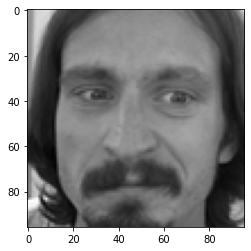

In [50]:
for i in range(5):
    plt.figure(i)
    plt.imshow(im_train2[i,:].reshape(96, 96), cmap="gray")

- 100*9216 (96*96) 크기의 데이터에 PCA를 적용  m = 100, n = 9216 m << n

In [51]:
face_scaler = StandardScaler().fit(im_train2)
im_train2_scale = face_scaler.transform(im_train2)

In [58]:
pca_face = PCA(n_components=0.9).fit(im_train2_scale) # n_components : Number of components to keep 개수를 넣으면 n개의 컴포넌트만 남김, PCA 안에 SVD_SOLVER가 있음 
np.cumsum(pca_face.explained_variance_ratio_)        # n_components가 0에서 1사이면, 분산의 90% 설명하는 최소 components를 구함

array([0.48466357, 0.5929637 , 0.64782934, 0.68572173, 0.71351795,
       0.73731138, 0.75656734, 0.77384997, 0.78879148, 0.80127075,
       0.81280618, 0.82257629, 0.8313898 , 0.83912777, 0.84638669,
       0.85298226, 0.85926315, 0.865202  , 0.87059593, 0.87563313,
       0.88058191, 0.88511357, 0.88948354, 0.89364895, 0.89766825,
       0.9014451 ])

In [59]:
pca_face2 = PCA().fit(im_train2_scale) 
np.cumsum(pca_face2.explained_variance_ratio_) 

array([0.48466357, 0.5929637 , 0.64782934, 0.68572173, 0.71351795,
       0.73731138, 0.75656734, 0.77384997, 0.78879148, 0.80127075,
       0.81280618, 0.82257629, 0.8313898 , 0.83912777, 0.84638669,
       0.85298226, 0.85926315, 0.865202  , 0.87059593, 0.87563313,
       0.88058191, 0.88511357, 0.88948354, 0.89364895, 0.89766825,
       0.9014451 , 0.90500826, 0.90841794, 0.91168331, 0.91484709,
       0.91791648, 0.9208009 , 0.92367078, 0.92641725, 0.92910022,
       0.93171362, 0.93418608, 0.93646934, 0.93872395, 0.94091548,
       0.94302474, 0.94511907, 0.94714218, 0.9490304 , 0.95086594,
       0.95264854, 0.95435018, 0.95599372, 0.95756927, 0.95912693,
       0.96067292, 0.96220565, 0.96363191, 0.96499362, 0.96634259,
       0.96766554, 0.96894001, 0.97016339, 0.97136901, 0.97255258,
       0.97366948, 0.97477388, 0.97584866, 0.9768893 , 0.97791936,
       0.97893493, 0.97991031, 0.98086836, 0.98179776, 0.98269917,
       0.98358376, 0.98443003, 0.98526568, 0.98606208, 0.98683

- n_components를 설정 안하면 A'A 행렬 V를 스펙트럼 분해 할 경우 많아봐야 m개의 람다 값만 나올 수 있음 즉, 0이 아닌 람다값이 100개 밖에 안나옴

In [60]:
PCA().fit(im_train2_scale).explained_variance_ratio_.shape

(100,)

- 분산의 90%를 설명하는 최소 PC를 사용하여 데이터 축소

In [61]:
X_reduced = pca_face.transform(im_train2_scale)

In [62]:
X_reduced.shape # y의 공간 26개, 9216 -> 26 축소, 단위는 픽셀이 아니라 변환된 공간에 있는 수치 

(100, 26)

$XV = U\Sigma,  $ $XV = 주성분를 의미$

- 축소된 PC를 사용하여 원래 데이터의 공간으로 재변환

In [63]:
X_reconstr = pca_face.inverse_transform(X_reduced)

In [64]:
X_reconstr.shape  # 실제로는 26개의 고윳값에 대하여 만들어진 matrix

(100, 9216)

- 이를 다시 recontruct 해주면 

 $XVV' = U\Sigma V'$
 
 $X = U\Sigma V'$ - 원상태로 복구가 된다.

In [65]:
im_train2_reconstr = face_scaler.inverse_transform(X_reconstr) # 원래 사진의 scale로 inverse 시켜줘야함

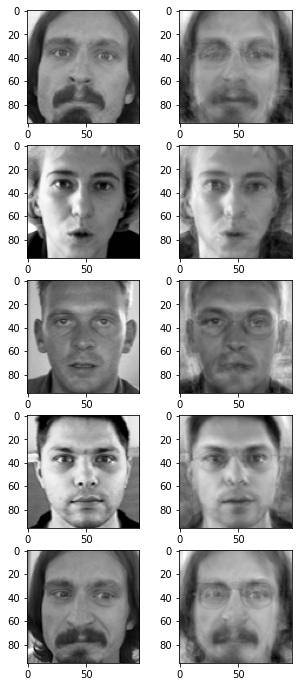

In [66]:
plt.figure(figsize=(5,12))
for i in np.arange(0,5):
    plt.subplot(5,2,2*i+1)
    plt.imshow(im_train2[i,:].reshape(96, 96), cmap="gray")
    plt.subplot(5,2,2*(i+1))
    plt.imshow(im_train2_reconstr[i,:].reshape(96, 96), cmap="gray")